In [6]:
import shap
import pandas as pd
from pathlib import Path
from AudioConcept.modeling.svm_classifier import SVMClassifier 
from AudioConcept.config import MODELS_DIR, PROCESSED_DATA_DIR
from XAI.xaiWaterfall import xaiWaterfall
from XAI.xaiHeatmap import xaiHeatmap
from XAI.xaiBeeswarm import xaiBeeswarm

In [3]:
features_path: Path = PROCESSED_DATA_DIR / "processed_dataset.csv"
model_path: Path = MODELS_DIR / "svm_genre_classifier.pkl"

In [ ]:
# 1st version

X_test_df = pd.read_csv(features_path).sample(n=50, random_state=42).reset_index(drop=True)
X_test_df = X_test_df.drop(columns=["Y"]) 
classifier = SVMClassifier()
classifier.load_model(model_path)
X_test_scaled = classifier.scaler.transform(X_test_df.values)
X20 = shap.utils.sample(X_test_scaled, 20)
explainer = shap.Explainer(classifier.model.predict, X20)
shap_values = explainer(X_test_df)
sample_ind = 20
shap.plots.waterfall(shap_values[sample_ind], max_display=14)
shap.plots.beeswarm(shap_values)
shap.plots.heatmap(shap_values)

2025-05-21 17:18:04.257 | INFO     | AudioConcept.modeling.svm_classifier:load_model:235 - Model loaded from C:\Users\weral\Desktop\WIMU\projekt\AudioConcept_project\AudioConcept\models\svm_genre_classifier.pkl


c:\Users\weral\Desktop\WIMU\projekt\AudioConcept_project\AudioConcept\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
PermutationExplainer explainer: 51it [00:28,  1.21it/s]                        


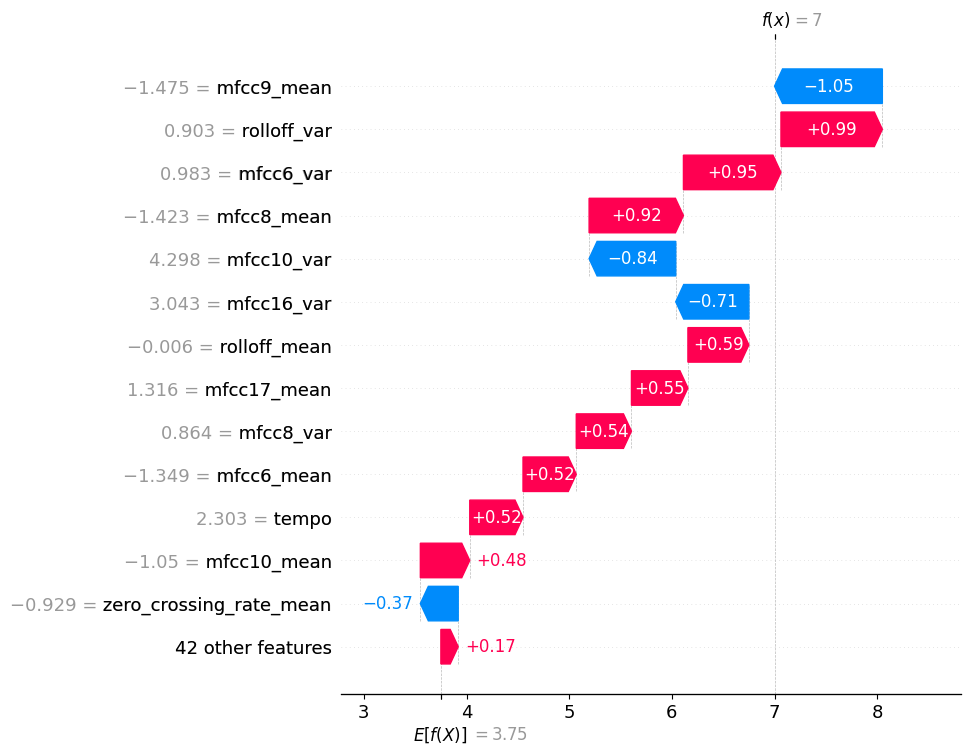

In [7]:
xai = xaiWaterfall()
xai.run()

2025-05-20 22:54:52.018 | INFO     | AudioConcept.modeling.svm_classifier:load_model:235 - Model loaded from C:\Users\weral\Desktop\WIMU\projekt\AudioConcept_project\AudioConcept\models\svm_genre_classifier.pkl


c:\Users\weral\Desktop\WIMU\projekt\AudioConcept_project\AudioConcept\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
PermutationExplainer explainer: 51it [00:44,  1.13s/it]                        


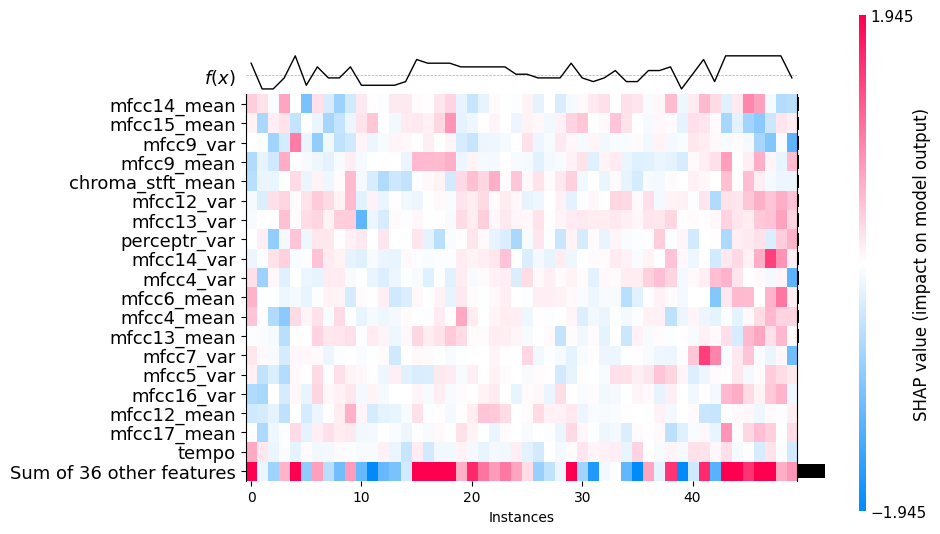

In [87]:
xai = xaiHeatmap()
xai.run()

2025-05-20 23:03:16.329 | INFO     | AudioConcept.modeling.svm_classifier:load_model:235 - Model loaded from C:\Users\weral\Desktop\WIMU\projekt\AudioConcept_project\AudioConcept\models\svm_genre_classifier.pkl


c:\Users\weral\Desktop\WIMU\projekt\AudioConcept_project\AudioConcept\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
PermutationExplainer explainer: 51it [00:53,  1.28s/it]                        


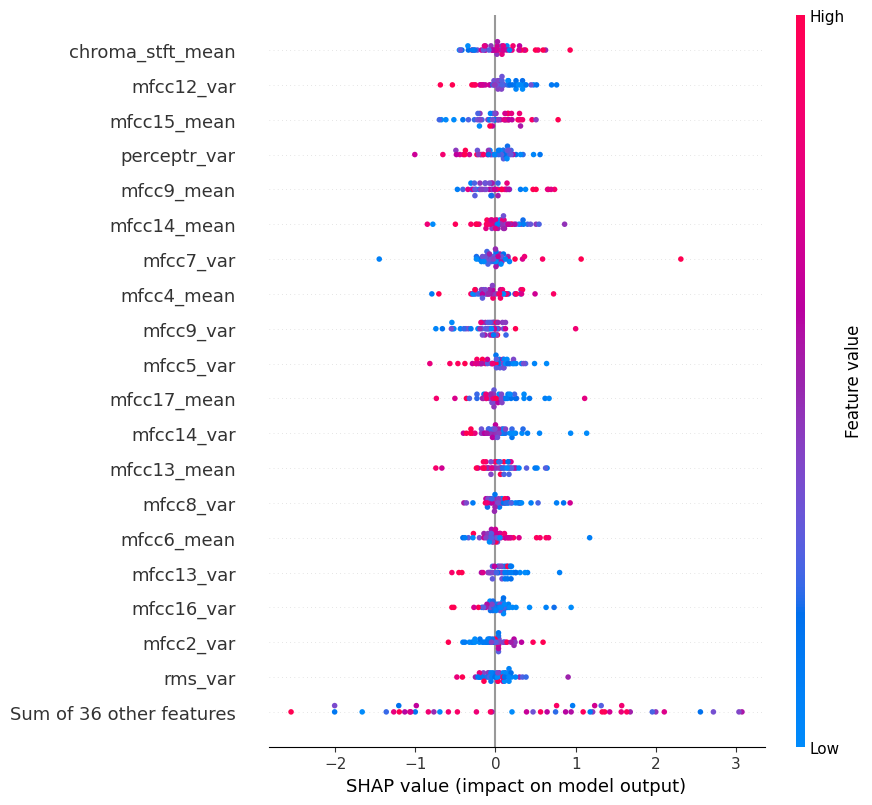

In [88]:
xai = xaiBeeswarm()
xai.run()